In [54]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)
# Combine the data into a single dataset
df_merge= pd.merge(ride_data, city_data, on="city")

# Display the data table for preview
df_merge.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


In [55]:
driver_t_df = df_merge[["city", "driver_count"]].drop_duplicates("city")
driver_tot = driver_t_df.rename(columns = {'driver_count': 'Driver Count'})

avg_f_group = df_merge.groupby("city")["fare"].mean()
avg_f_df = pd.DataFrame(avg_f_group).reset_index()
avg_fare_df = avg_f_df.rename(columns = {'fare': 'Avg fare'})

ride_t_group = df_merge.groupby("city")["ride_id"].count()
ride_t_df = pd.DataFrame(ride_t_group).reset_index()
ride_tot = ride_t_df.rename(columns = {'ride_id': 'Total Rides'})

city_type = df_merge[["city", "type"]].drop_duplicates("city")

bubble_df = pd.merge(pd.merge(pd.merge(avg_fare_df, ride_tot_fare, on="city"), 
                             driver_tot, on="city"), city_type, on="city")
bubble_df.head()


,city,Avg fare,Total Rides,Driver Count,type
0,Amandaburgh,24.641667,18,12,Urban
1,Barajasview,25.332273,22,26,Urban
2,Barronchester,36.422500,16,11,Suburban
3,Bethanyland,32.956111,18,22,Suburban
4,Bradshawfurt,40.064000,10,7,Rural


## Bubble Plot of Ride Sharing Data

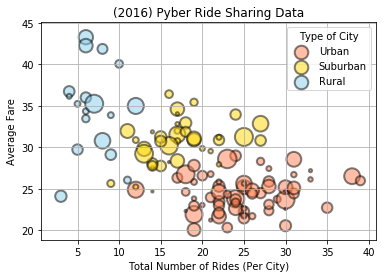

In [56]:
# Obtain the x and y coordinates for each of the three city types
rur_g= bubble_df.loc[bubble_df['type']=='Rural']
subur_g= bubble_df.loc[bubble_df['type']=='Suburban']
urb_g= bubble_df.loc[bubble_df['type']=='Urban']

ax1= urb_g.plot(kind='scatter',x='Total Rides', y='Avg fare',
                       color='coral', s=bubble_df['Driver Count']*5, label = 'Urban', 
                       alpha = 0.5, edgecolor = "black", linewidths = 2)    
ax2= subur_g.plot(kind='scatter', x='Total Rides', y='Avg fare', 
                          color='gold',s=bubble_df['Driver Count']*5, label = 'Suburban', 
                          alpha = 0.5, edgecolor = "black", linewidths = 2, ax=ax1)    
ax3= rur_g.plot(kind='scatter', x='Total Rides', y='Avg fare', 
                       color='skyblue', s=bubble_df['Driver Count']*5, label = 'Rural', 
                       alpha = 0.5, edgecolor = "black", linewidths = 2, ax=ax1)

# Incorporate the other graph properties
plt.title("(2016) Pyber Ride Sharing Data")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare")
plt.legend(title = 'Type of City')
plt.grid(True)
plt.show()


## Total Fares by City Type

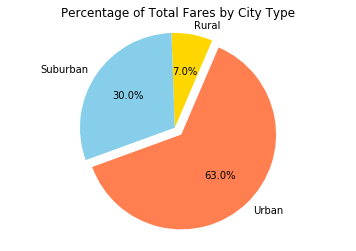

In [57]:
# Calculate Type Percents
subur_fare= df_merge.loc[df_merge["type"]=="Suburban", "fare"].sum()
urb_fare= df_merge.loc[df_merge["type"]=="Urban", "fare"].sum()
rur_fare= df_merge.loc[df_merge["type"]=="Rural", "fare"].sum()
fare_tot= df_merge["fare"].sum()


urb_fare_pie= round(urb_fare/fare_tot, 2) *100
rur_fare_pie= round(rur_fare/fare_tot, 2) *100
subur_fare_pie= round(subur_fare/fare_tot, 2) *100
# Build Pie Chart
sizes = [urb_fare_pie, rur_fare_pie, subur_fare_pie]
labels = 'Urban', 'Rural', 'Suburban'
explode = (0.1, 0, 0) 

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=200, colors = ["coral", "gold", "skyblue"])
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Percentage of Total Fares by City Type")

plt.show()

## Total Rides by City Type

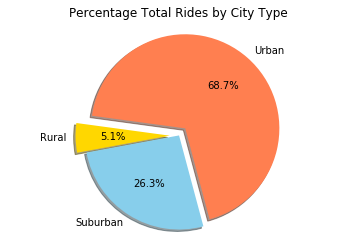

In [58]:
# Calculate Ride Percents
tot_rides_pie=len(df_merge)
urb_r_pie=round(df_merge.loc[df_merge["type"]=="Urban", "ride_id"].count()/tot_rides_pie, 2) * 100
subur_r_pie=round(df_merge.loc[df_merge["type"]=="Suburban", "ride_id"].count()/tot_rides_pie, 2) * 100
rur_r_pie=round(df_merge.loc[df_merge["type"]=="Rural", "ride_id"].count()/tot_rides_pie, 2) * 100

# Pie chart
data= [urb_r_pie, rur_r_pie, subur_r_pie]
types= 'Urban', 'Rural', 'Suburban'
explode= (0.1, 0.1, 0) 

fig1, ax1=plt.subplots()
ax1.pie(data, explode=explode, labels=types, autopct='%1.1f%%',
        shadow=True, startangle=285, colors=["coral", "gold", "skyblue"])
ax1.axis('equal') 
plt.title("Percentage Total Rides by City Type")

plt.show()

## Total Drivers by City Type

In [59]:
# Calculate Driver Percents
tot_drivers= df_merge["Driver Count"].sum()
subur_drivers= round(df_merge.loc[df_merge["type"]=="Suburban", "Driver Count"].sum()/tot_drivers, 2)* 100
urb_drivers= round(df_merge.loc[df_merge["type"]=="Urban", "Driver Count"].sum()/tot_drivers, 2)* 100
rur_drivers= round(df_merge.loc[df_merge["type"]=="Rural", "Driver Count"].sum()/tot_drivers, 2)* 100

data = [urb_drivers, subur_drivers, rur_drivers]
types = 'Urban', 'Rural', 'Suburban'
explode = (0.2, 0, 0)

fig1, ax1 = plt.subplots()
ax1.pie(data, explode=explode, labels=types, autopct='%1.1f%%',
        shadow=True, startangle=220, colors = ["coral", "gold", "skyblue"])
ax1.axis('equal')
plt.title("Percentage Total Drivers by City Type")
plt.show()

KeyError: 'Driver Count'